# Get list of artists from Wikipedia mentioned in the Lives  of Vasari
#### (https://en.wikipedia.org/wiki/Lives_of_the_Most_Excellent_Painters,_Sculptors,_and_Architects) with Beautiful Soup

#### based on Jeri Wieringa, "Intro to Beautiful Soup," The Programming Historian 1 (2012), https://doi.org/10.46430/phen0008.

In [5]:
import urllib.request, urllib.error, urllib.parse
import csv
from bs4 import BeautifulSoup
import html2text
import os
from datetime import datetime
import numpy as np
import pandas as pd
import json
from urllib.request import urlopen
from PIL import Image

### Helping functions

In [2]:
# function to check if 'nan'
def isnan(x):
    return x != x   

In [6]:
# obo.py
# get rid of tags without Beautiful Soup
def stripTags(pageContent):
    pageContents = str(pageContent)

    inside = 0
    text = ''

    for char in pageContents:
        if char == '<':
            inside = 1
        elif (inside == 1 and char == '>'):
            inside = 0
        elif inside == 1:
            continue
        else:
            text += char

    return text

### save 'Lives' Wikipedia article as .txt (!)

In [17]:
# https://en.wikipedia.org/wiki/Lives_of_the_Most_Excellent_Painters,_Sculptors,_and_Architects
lives_url = 'https://en.wikipedia.org/wiki/Lives_of_the_Most_Excellent_Painters,_Sculptors,_and_Architects'

response = urllib.request.urlopen(lives_url)
webContent = response.read()
f = open('lives.txt', 'wb')
f.write(webContent)
f.close() 

### Open manually modified .txt and make a Beautiful Soup

Delete the text by hand and keep only the list of artists with their links to the wikipedia articles

In [ ]:
soup = BeautifulSoup(open('lives.txt'), "lxml")
print(soup.prettify())

### find all artists and their Wikipedia URL

In [148]:
#soup.find_all('a')

In [130]:
# get the href URL and the name as the content of the tag

links = soup.find_all('a')
for link in links:
    names = link.contents[0]
    fullLink = link.get('href')
    print(names)
    print('https://en.wikipedia.org'+fullLink)

Cimabue
https://en.wikipedia.org/wiki/Cimabue
Arnolfo di Lapo
https://en.wikipedia.org/wiki/Arnolfo_di_Cambio
Bonanno
https://en.wikipedia.org/wiki/Bonanno_Pisano
Nicola Pisano
https://en.wikipedia.org/wiki/Nicola_Pisano
Giovanni Pisano
https://en.wikipedia.org/wiki/Giovanni_Pisano
Andrea Tafi
https://en.wikipedia.org/wiki/Andrea_Tafi_(artist)
Gaddo Gaddi
https://en.wikipedia.org/wiki/Gaddo_Gaddi
Margaritone
https://en.wikipedia.org/wiki/Margaritone_d%27Arezzo
Giotto
https://en.wikipedia.org/wiki/Giotto_di_Bondone
Puccio Capanna
https://en.wikipedia.org/wiki/Puccio_Capanna
Agostino
https://en.wikipedia.org/wiki/Agostino_da_Siena
Agnolo
https://en.wikipedia.org/wiki/Agnolo_da_Siena
Stefano
https://en.wikipedia.org/wiki/Stefano_Fiorentino
Ugolino
https://en.wikipedia.org/wiki/Ugolino_di_Nerio
Pietro Lorenzetti
https://en.wikipedia.org/wiki/Pietro_Lorenzetti
Andrea Pisano
https://en.wikipedia.org/wiki/Andrea_Pisano
Buonamico Buffalmacco
https://en.wikipedia.org/wiki/Buonamico_Buffalmacco


### make list with URL and artistname

In [146]:
artist_list = list()
links = soup.find_all('a')
for link in links:
    artist = list()
    names = link.contents[0]
    fullLink = link.get('href')
    artist.append(names)
    artist.append('https://en.wikipedia.org'+fullLink)
    if fullLink.startswith('/wiki'):
        artist_list.append(artist)
    #print(artist)
    
len(artist_list)

292

In [121]:
#save artist_list as artist.csv
csv_artists = csv.writer(open('artist.csv', "w"))

#Write column headers as the first line
csv_artists.writerow(["Name", "wiki-link"]) 

16

## get Wikidata Item ID with the artist URLs
 "wgWikibaseItemId"
https://en.wikipedia.org/wiki/Cimabue

In [138]:
# get length of string
len('wgWikibaseItemId')

16

In [137]:

qid_list = list() # new list with wikidata Q-ID
count = 0

for i in range(len(artist_list)): # artist_list containing name and wikidata-url 
    artist_name = artist_list[i][0]
    artist_url = artist_list[i][1]

    response = urllib.request.urlopen(artist_url) # open url 
    webContent = response.read()  # get html
    id_index_start = (str(webContent).find('wgWikibaseItemId')) + 19 # get wikidata id
    id_index_end = id_index_start + 10 # estimated length of the qid
    
    wikidata_id = str(webContent)[id_index_start:id_index_end] # store wikidata id
    
    artist = [artist_name, wikidata_id, artist_url] # new list for every artist
    qid_list.append(artist) # append to new artist list

    #print(wikidata_id, count)
    count+=1
    
len(qid_list)

292

In [139]:
qid_list[0]

['Cimabue', 'Q15790"};R', 'https://en.wikipedia.org/wiki/Cimabue']

## convert qid_list to dataframe and save as csv

In [54]:
filename = 'artist_qid.csv'

In [141]:
columns = ['Name', 'Wikidata-Q-ID', 'Wikipedia-URL']

In [57]:
# make Dataframe
#df_qid = pd.DataFrame(qid_list, columns = columns)

# save Dataframe as CSV
#df_qid.to_csv(filename, index = False, header=True)

In [ ]:
# open csv as dataframe
df = pd.read_csv(filename)

In [56]:
#save dataframe as csv
df.to_csv(filename, index = False, header=True)

# OPEN CSV file as dataframe

In [7]:
# open csv as dataframe
filename = '../data/artist_qid_html.csv'
#csv_file = csv.reader(open(filename, "r"))
df = pd.read_csv(filename)
df

,Unnamed: 0,Name,Wikidata-Q-ID,Wikipedia-URL,URL-names,Summary,Wikipedia-json,image,thumbnail,birth,...,REAL MET Object IDS,cloudinary thumbnails,URLs MET,cloudinary artworks,Rijks name,URLs Rijk,Rijks img dates,Rijks img PIDs,Rijks img Inrs,extract_html
0,0,Cimabue,Q15790,https://en.wikipedia.org/wiki/Cimabue,Cimabue,"Cimabue, also known as Cenni di Pepo or Cenni ...","{'type': 'standard', 'title': 'Cimabue', 'disp...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1240,...,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN,[],[],[],[],[],"<p><b>Cimabue</b>, also known as <b>Cenni di P..."
1,1,Arnolfo di Lapo,Q315249,https://en.wikipedia.org/wiki/Arnolfo_di_Cambio,Arnolfo_di_Cambio,Arnolfo di Cambio was an Italian architect and...,"{'type': 'standard', 'title': 'Arnolfo di Camb...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1240,...,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN,[],[],[],[],[],<p><b>Arnolfo di Cambio</b> was an Italian arc...
2,2,Bonanno,Q892084,https://en.wikipedia.org/wiki/Bonanno_Pisano,Bonanno_Pisano,"Bonanno Pisano (Pisa), active in the 1170s and...","{'type': 'standard', 'title': 'Bonanno Pisano'...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,9999,...,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN,[],[],[],[],[],"<p><b>Bonanno Pisano</b> (Pisa), active in the..."
3,3,Nicola Pisano,Q364413,https://en.wikipedia.org/wiki/Nicola_Pisano,Nicola_Pisano,Nicola Pisano was an Italian sculptor whose wo...,"{'type': 'standard', 'title': 'Nicola Pisano',...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1225,...,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN,[],[],[],[],[],<p><b>Nicola Pisano</b> was an Italian sculpto...
4,4,Giovanni Pisano,Q314932,https://en.wikipedia.org/wiki/Giovanni_Pisano,Giovanni_Pisano,"Giovanni Pisano was an Italian sculptor, paint...","{'type': 'standard', 'title': 'Giovanni Pisano...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1248,...,"[463414, 463415, 465937, 466326]",https://res.cloudinary.com/dfyzsulq8/image/upl...,['https://images.metmuseum.org/CRDImages/md/we...,['https://res.cloudinary.com/dfyzsulq8/image/u...,[],[],[],[],[],<p><b>Giovanni Pisano</b> was an Italian sculp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,Dono Doni,Q714914,https://en.wikipedia.org/wiki/Dono_Doni,Dono_Doni,"Dono Doni, also known as Adone Doni or Dono de...","{'type': 'standard', 'title': 'Dono Doni', 'di...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1500,...,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN,[],[],[],[],[],"<p><b>Dono Doni</b>, also known as <b>Adone Do..."
288,288,Cesare Nebbia,Q503575,https://en.wikipedia.org/wiki/Cesare_Nebbia,Cesare_Nebbia,Cesare Nebbia (c.1536–c.1622) was an Italian p...,"{'type': 'standard', 'title': 'Cesare Nebbia',...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1536,...,"[340591, 340835, 340836, 340854, 340855, 34157...",https://res.cloudinary.com/dfyzsulq8/image/upl...,['https://images.metmuseum.org/CRDImages/dp/we...,['https://res.cloudinary.com/dfyzsulq8/image/u...,"Nebbia, Cesare",['https://lh4.ggpht.com/9fdB8ox9dqpldh_XVMRwW1...,['1546'],['http://hdl.handle.net/10934/RM0001.COLLECT.4...,['RP-T-1952-29'],<p><b>Cesare Nebbia</b> (c.1536–c.1622) was an...
289,289,Niccolò Circignani detto il Pomarancio,Q382762,https://en.wikipedia.org/wiki/Niccol%C3%B2_Cir...,Niccol%C3%B2_Circignani,Niccolò Circignani was an Italian painter of t...,"{'type': 'standard', 'title': 'Niccolò Circign...",https://upload.wikimedia.org/wikipedia/commons...,https://

### clean the q_id

In [65]:
# clean by filter by .isnumeric (example for qid: 'Q15790"};R')
new_qid = list()
for i in range(len(df)):
    q_id = "Q"
    for j in range(len(df['Wikidata-Q-ID'][i])):
        
        if df['Wikidata-Q-ID'][i][j].isnumeric():
            q_id += df['Wikidata-Q-ID'][i][j]
       
    new_qid.append(q_id)
    #print(q_id)            

In [ ]:
df['Wikidata-Q-ID'] = new_qid
#df

### get the names of the wikipedia articles

In [68]:
len('https://en.wikipedia.org/wiki/')

30

In [70]:
url = df['Wikipedia-URL'][3]
url[30:]

'Nicola_Pisano'

In [72]:
names = list()
for i in range(len(df)):
    url = df['Wikipedia-URL'][i]
    names.append(url[30:])
    #print(url[30:])

In [73]:
df['URL-names'] = names
df

,Name,Wikidata-Q-ID,Wikipedia-URL,URL-names
0,Cimabue,Q15790,https://en.wikipedia.org/wiki/Cimabue,Cimabue
1,Arnolfo di Lapo,Q315249,https://en.wikipedia.org/wiki/Arnolfo_di_Cambio,Arnolfo_di_Cambio
2,Bonanno,Q892084,https://en.wikipedia.org/wiki/Bonanno_Pisano,Bonanno_Pisano
3,Nicola Pisano,Q364413,https://en.wikipedia.org/wiki/Nicola_Pisano,Nicola_Pisano
4,Giovanni Pisano,Q314932,https://en.wikipedia.org/wiki/Giovanni_Pisano,Giovanni_Pisano
...,...,...,...,...
287,Dono Doni,Q714914,https://en.wikipedia.org/wiki/Dono_Doni,Dono_Doni
288,Cesare Nebbia,Q503575,https://en.wikipedia.org/wiki/Cesare_Nebbia,Cesare_Nebbia
289,Niccolò Circignani detto il Pomarancio,Q382762,https://en.wikipedia.org/wiki/Niccol%C3%B2_Cir...,Niccol%C3%B2_Circignani
290,Bronzino,Q7803,https://en.wikipedia.org/wiki/Bronzino,Bronzino


# SAVE df as 'artist_qid.csv'

In [4]:
# save again as csv

filename = 'artist_qid.csv'
#df.to_csv(filename, index = False, header=True)

# load wikipedia api json files for getting the summaries

In [76]:
url_base = 'https://en.wikipedia.org/api/rest_v1/page/summary/'

In [77]:
url = url_base + df['URL-names'][5]
url

'https://en.wikipedia.org/api/rest_v1/page/summary/Andrea_Tafi_(artist)'

#### test with a single URL

In [110]:
    response = urllib.request.urlopen(url) 
    webContent = response.read()
    #str(webContent).find('extract') # 1342
    my_json = webContent.decode('utf8')
    data = json.loads(my_json)
    data['extract']

'Andrea Tafi (1213–1294) was an Italian artist. He is probably best known for his work on the mosaics of the Baptistery in Florence, which were started in 1225 by Jacobus. His pupils included Buonamico Buffalmacco.'

### build iterator for summary extraction

In [112]:
url_base = 'https://en.wikipedia.org/api/rest_v1/page/summary/'

extract_list = list() # list to store all the summaries

for i in range(len(df)):
    url = url_base + df['URL-names'][i]  # store url
    response = urllib.request.urlopen(url) # load url
    webContent = response.read()             # get html
    my_json = webContent.decode('utf8')       # decode utf-8
    data = json.loads(my_json)                  # load json
    extract = data['extract']                     # get summary
    extract_list.append(extract)   
len(extract_list)

292

In [119]:
# append new column 'Summary' to the dataframe
df['Summary'] = extract_list
#df

### build iterator for complete Wikipedia json strings

In [121]:
url_base = 'https://en.wikipedia.org/api/rest_v1/page/summary/'

json_list = list() # list to store all the jsons

for i in range(len(df)):
    url = url_base + df['URL-names'][i]
    response = urllib.request.urlopen(url) 
    webContent = response.read()
    my_json = webContent.decode('utf8')       # decode utf-8
    data = json.loads(my_json)                      # load json
    json_list.append(data)
len(json_list)

292

In [168]:
# append new column 'Wikipedia-json' to the dataframe
df['Wikipedia-json'] = json_list
#df

### make df_fullWiki as a normalized dataframe 

In [141]:
# make new NORMALIZED dataframe from the json lists
df_fullWiki = pd.json_normalize((json_list))
#df_fullWiki

In [142]:
# save df_fullWiki as csv
filename = 'Wikipedia_json-list.csv'
df_fullWiki.to_csv(filename, index = False, header=True)

In [136]:
column_list = df_fullWiki.columns.to_list()
#column_list

### include originalimage and thumbnail from df_fullWiki in df

In [140]:
# include new columns in original dataframe df
df['image'] = df_fullWiki['originalimage.source']
df['thumbnail'] = df_fullWiki['thumbnail.source']
#df

# Iterator for WIKIDATA API to get jsons

### extracting year of birth (via P569)

In [ ]:
# if there are more than one value given, take the average 
url_base1 = 'https://www.wikidata.org/w/api.php?action=wbgetclaims&format=json&entity=' # wikidata API
url_base2 = '&property=P569' # API property for birth

birth_list = list() # list to store all the jsons
for i in range(len(df)):
    
    url = url_base1 + df['Wikidata-Q-ID'][i] + url_base2 # get url
    response = urllib.request.urlopen(url)     # load url
    webContent = response.read()               # get html
    my_json = webContent.decode('utf8')       # decode utf-8
    data = json.loads(my_json)                # load json
    df_first = pd.json_normalize((data['claims']))   # normalize json
    if df_first.empty:                               # no value?
        birth = 9999
    else:
        df_second = pd.json_normalize(df_first['P569'][0]) # unravel nested json
        if len(df_second.columns) < 8:
            birth = 9999
        elif len(df_second) == 1:
            birth = df_second['mainsnak.datavalue.value.time'][0][1:5]
        else:
            year = 0
            for k in range(len(df_second)):
                year += int(df_second['mainsnak.datavalue.value.time'][k][1:5])
                birth = round(year/len(df_second))
                   
    birth_list.append(int(birth))   # store value in list
    print(birth)   
#len(birth_list)

### extracting year of death (via P570)

In [ ]:
# if there are more than one value given, take the average
url_base1 = 'https://www.wikidata.org/w/api.php?action=wbgetclaims&format=json&entity='
url_base2 = '&property=P570'
death_list = list() # list to store all the jsons
for i in range(len(df)):    
    url = url_base1 + df['Wikidata-Q-ID'][i] + url_base2    
    response = urllib.request.urlopen(url)     
    webContent = response.read()
    my_json = webContent.decode('utf8')       # decode utf-8
    data = json.loads(my_json)
    df_first = pd.json_normalize((data['claims']))
    if df_first.empty:
        death = 9999
    else:
        df_second = pd.json_normalize(df_first['P570'][0])
        if len(df_second.columns) < 8:
            death = 9999
        elif len(df_second) == 1:
            death = df_second['mainsnak.datavalue.value.time'][0][1:5]
        else:
            year = 0
            for k in range(len(df_second)):
                year += int(df_second['mainsnak.datavalue.value.time'][k][1:5])
                death = round(year/len(df_second))                   
    death_list.append(int(death))
    print(death)   
#len(birth_list)

### calculate position in timeline

In [ ]:
#calculate the position in timeline by the middle between birth & death
timeline_position = list()
for i in range(len(birth_list)):
    position = (death_list[i] + birth_list[i]) / 2
    timeline_position.append(round(position))
timeline_position    

### get VIAF Identifier from Wikidata (via P214)

In [ ]:
# extract the years from the list
# if there are more than one value given, take the average!

url_base1 = 'https://www.wikidata.org/w/api.php?action=wbgetclaims&format=json&entity='
url_base2 = '&property=P214'

VIAF_list = list() # list to store all the jsons

for i in range(len(df)):    
    url = url_base1 + df['Wikidata-Q-ID'][i] + url_base2    
    response = urllib.request.urlopen(url)     
    webContent = response.read()
    my_json = webContent.decode('utf8')       # decode utf-8
    data = json.loads(my_json)
    df_first = pd.json_normalize((data['claims']))
    if df_first.empty:
        VIAF = 0
    else:
        df_second = pd.json_normalize(df_first['P214'][0])
        if len(df_second.columns) < 5:
            VIAF = 0
        else:
            VIAF = df_second['mainsnak.datavalue.value'][0]             
                    
    VIAF_list.append(int(VIAF))
    #print(VIAF, 'index: ', (i))    
#len(birth_list)

#### add birth, death, timeline position and VIAF to df

In [278]:
df['birth'] = birth_list
df['death'] = death_list
df['timeline_position'] = timeline_position
df['VIAF'] = VIAF_list
#df

In [293]:
# save as csv
filename = 'artist_qid.csv'
df.to_csv(filename, index = False, header=True)

# Download thumbnail images

#### open new Image squared size, paste the thumbnail and save as 'portrait_xxx.jpg'

In [6]:
# test with one file [8] Giotto
# open thumbnail, get width, height
img = Image.open(urlopen(df['thumbnail'][8]))
width, height = img.size

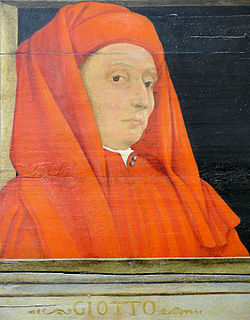

In [7]:
img

In [8]:
# store the bigger one in s

if width < height:
    s = height
else:
    s = width
s

320

In [320]:
# create empty Image file in thumbnail size squared
index = '008'

new_img = Image.new('RGB', (s, s))

new_img.paste(img, (0, 0))
new_img.save('./thumbnails/cables/thumbnail_' + index + '.jpg')

## build iterator for thumbnail download 

In [48]:
#index = 158
index

286

In [ ]:
# open thumbnail, get width, height

# limit the iterator (8 per call)

for i in range(8):
    # load file
    index += 1
    if isnan(df['thumbnail'][(int(index))]): # sort nan values out
        continue
        
    else:
        img = Image.open(urlopen(df['thumbnail'][(int(index))]))
        width, height = img.size
        # store the bigger one in s
        if width < height:
            s = height
        else:
            s = width
        
        # create empty Image file in thumbnail size squared
        new_img = Image.new('RGBA', (s,s), (255, 0, 0, 0))
        #new_img = Image.new('RGB', (s, s))
        new_img.paste(img, (s-width, 0))
    
        # filename
        if index < 10:
            filename = './thumbnails/cables/thumbnails/thumbnail_00' + str(index) + '.png'
        elif index < 100:
            filename = './thumbnails/cables/thumbnails/thumbnail_0' + str(index) + '.png'
        else:
            filename = './thumbnails/cables/thumbnails/thumbnail_' + str(index) + '.png'
        
        new_img.save(filename, 'PNG')   

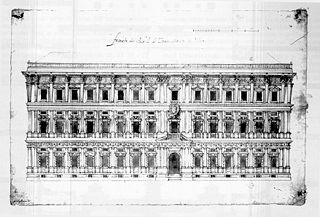

In [52]:
img = Image.open(urlopen(df['thumbnail'][index-10]))
img

## build iterator for image download 

In [498]:
index = -1
index

-1

In [499]:
# open thumbnail, get width, height

# limit the iterator (10 per call)

for i in range(10):
    
    # load file by index
    index += 1
    
    if isnan(df['image'][(int(index))]): # sort nan values out
        continue
        
    else:
        img = Image.open(urlopen(df['image'][(int(index))]))
        width, height = img.size
        # store the bigger one in s
        if width < height:
            s = height
        else:
            s = width
        
        # create empty Image file in thumbnail size squared
        new_img = Image.new('RGBA', (s, s), (255, 0, 0, 0))
        new_img.paste(img, (s-width, 0))
    
        # filename
        if index < 10:
            filename = './thumbnails/cables/images/image_00' + str(index) + '.png'
        elif index < 100:
            filename = './thumbnails/cables/images/image_0' + str(index) + '.png'
        else:
            filename = './thumbnails/cables/images/image_' + str(index) + '.png'
        
        new_img.save(filename, 'PNG')  

## test to fix the black padding

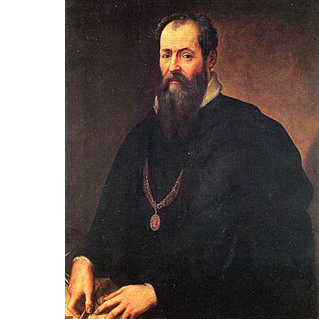

In [482]:
        width, height = img.size
        # store the bigger one in s
        if width < height:
            s = height
            
        else:
            s = width
        
        # create empty Image file in thumbnail size squared
        new_img = Image.new('RGBA', (s,s), (255, 0, 0, 0))        
        new_img.paste(img, (s-width, 0))

        new_img
        
        filename = 'a_test_291.png'

        new_img.save(filename, 'PNG')
        #width

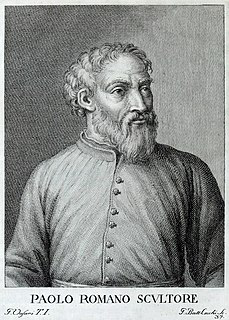

In [408]:
img

In [367]:
#df

### make .txt files for cables

In [371]:
names = ''
for i in df['Name']:
    names+=i+','
    
names = names.strip(',')

In [372]:
position = ''
for i in df['timeline_position']:
    position+=str(i) +','
    
position = position.strip(',')

In [ ]:
cloudinary = ''
for i in df['cloudinary thumbnails']:
    cloudinary +=str(i) +','
    
cloudinary = cloudinary.strip(',')
cloudinary

In [510]:
#cables_path = "/assets/609d91f2a3afde33db68c585/thumbnail_00"
index2 = 0
filename_list = ''

for i in range(292):
    
    if index2 < 10:
        filename = "/assets/609d91f2a3afde33db68c585/thumbnail_00" + str(index2) + '.png'
    elif index2 < 100:
        filename = "/assets/609d91f2a3afde33db68c585/thumbnail_0" + str(index2) + '.png'
    else:
        filename = "/assets/609d91f2a3afde33db68c585/thumbnail_" + str(index2) + '.png'
    index2+=1
    filename_list += filename + ',\n'
#filename_list

In [373]:
death = ''
for i in df['death']:
    death+=str(i)+','
    
death = death.strip(',')

In [374]:
birth = ''
for i in df['birth']:
    birth+=str(i)+','
    
birth = birth.strip(',')

In [375]:
summary = ''
for i in df['Summary']:
    summary+=i+'§\n'
    
summary = summary.strip(',')

### save names, summaries, positions, birth and death as .txt

In [376]:
f = open('./thumbnails/names.txt', 'wb') # names
f.write(names.encode("utf-8"))
f.close()

In [377]:
f = open('./thumbnails/summary.txt', 'wb') # summary
f.write(summary.encode("utf-8"))
f.close()

In [49]:
f = open('./thumbnails/cloudinary.txt', 'wb') # thumbnails cloudinary
f.write(cloudinary.encode("utf-8"))
f.close()

In [581]:
f = open('./thumbnails/position.txt', 'wb') # position
f.write(str(storage).replace(' ', '').encode("utf-8"))
f.close()

In [558]:
#for i in str(storage):
   # print(i)

len(storage)

292

In [379]:
f = open('./thumbnails/birth.txt', 'wb') # birth
f.write(birth.encode("utf-8"))
f.close()

In [380]:
f = open('./thumbnails/death.txt', 'wb') # death
f.write(death.encode("utf-8"))
f.close()

In [511]:
f = open('./thumbnails/thumbnails.txt', 'wb') # thumbnail filenames
f.write(filename_list.encode("utf-8"))
f.close()

## clean position in timeline
### if a year already appeared +=1

In [133]:
#position

In [579]:
storage = list()
pos_list = position.split(',')

for i in range(len(pos_list)):
    x = int(pos_list[i])
    if x == 9999:
        storage.append(x)
    elif x not in storage:
        storage.append(x)
        
    else:
        x -= 5
        while x in storage:
            x+=0.5
        storage.append(x)   
        
len(storage)    

292

In [584]:
for i in range(len(storage)):
    print(' vs originial: ' , pos_list[i], storage[i])

 vs originial:  1271 1271
 vs originial:  1271 1266
 vs originial:  9999 9999
 vs originial:  1254 1254
 vs originial:  1282 1282
 vs originial:  1254 1249
 vs originial:  1276 1276
 vs originial:  1268 1268
 vs originial:  1304 1304
 vs originial:  1400 1400
 vs originial:  1316 1316
 vs originial:  1316 1311
 vs originial:  1326 1326
 vs originial:  1305 1305
 vs originial:  1314 1314
 vs originial:  1319 1319
 vs originial:  1308 1308
 vs originial:  1319 1314.5
 vs originial:  1285 1285
 vs originial:  1314 1309
 vs originial:  1324 1324
 vs originial:  1328 1328
 vs originial:  1341 1341
 vs originial:  1340 1340
 vs originial:  1412 1412
 vs originial:  1373 1373
 vs originial:  1400 1395
 vs originial:  1365 1365
 vs originial:  1287 1287
 vs originial:  1400 1395.5
 vs originial:  1326 1321
 vs originial:  1380 1380
 vs originial:  1384 1384
 vs originial:  1324 1319.5
 vs originial:  1398 1398
 vs originial:  1392 1392
 vs originial:  1388 1388
 vs originial:  1412 1407
 vs or

In [580]:
#set(storage)

# END

In [585]:
import joblib

In [289]:
url = url_base1 + df['Wikidata-Q-ID'][2] + url_base2
url

'https://www.wikidata.org/w/api.php?action=wbgetclaims&format=json&entity=Q892084&property=P214'

In [282]:
url_base1 = 'https://www.wikidata.org/w/api.php?action=wbgetclaims&format=json&entity='
url_base2 = '&property=P214'
Q = df['']
url = url_base1 + Q + url_base2
url

'https://www.wikidata.org/w/api.php?action=wbgetclaims&format=json&entity=Q128027&property=P214'

In [290]:
response = urllib.request.urlopen(url) 
    
webContent = response.read()
my_json = webContent.decode('utf8')       # decode utf-8
data = json.loads(my_json)
df_first = pd.json_normalize((data['claims']))
df_second = pd.json_normalize(df_first['P214'][0])
df_second

,type,id,rank,references,mainsnak.snaktype,mainsnak.property,mainsnak.hash,mainsnak.datavalue.value,mainsnak.datavalue.type,mainsnak.datatype
0,statement,Q892084$C3D22AD6-A831-46A2-BE94-1FF78B35E8BA,normal,[{'hash': '9a24f7c0208b05d6be97077d855671d1dfd...,value,P214,46fc65a0d0a15cf352dcb1e94657d228522103e1,95743493,string,external-id
1,statement,Q892084$334a5ec0-40ac-e161-bab2-e0215b44340d,normal,NaN,value,P214,1be22e2cf2a190a93b2cf2c03eba21189336cdcc,300159474179227661355,string,external-id


In [ ]:
# append new column 'Wikipedia-json' to the dataframe
df['Wikipedia-json'] = json_list
df

In [141]:
# make new dataframe from the json lists

#df_fullWiki = pd.json_normalize((json_list))
#df_fullWiki

In [142]:
# save again as csv
filename = 'Wikipedia_json-list.csv'
df_fullWiki.to_csv(filename, index = False, header=True)

In [136]:
column_list = df_fullWiki.columns.to_list()
#column_list

In [140]:
# include new columns in original dataframe df

df['image'] = df_fullWiki['originalimage.source']
df['thumbnail'] = df_fullWiki['thumbnail.source']
#df

# Prepare data for usage with CABLES

# save again as csv
artist_wiki_names = df['URL-names']
df_names = pd.DataFrame()
df_names['URL-names'] = df['URL-names']
filename = 'artist_wiki_names.csv'
df_names.to_csv(filename, index = False, header=False)
#df_names

In [9]:
#df

# make single json file

### make cloudinary filename list

#### for the thumbnails

In [ ]:
list_of_cloud_thumbnail_filenames = os.listdir('thumbnails_2')
#list_of_cloud_thumbnail_filenames

In [ ]:
# cloudinary filename example: 'thumbnail_069_v5cgwi.png'
# build filename list for .startswith comparison
index2 = 0
filename_list = []
for i in range(292):
    
    if index2 < 10:
        filename = "thumbnail_00" + str(index2) 
    elif index2 < 100:
        filename = "thumbnail_0" + str(index2)
    else:
        filename = "thumbnail_" + str(index2)
    index2+=1
    filename_list.append(filename)
filename_list

In [44]:
list_of_cloud_thumbnail_filenames = os.listdir('thumbnails_2')
#list_of_cloud_thumbnail_filenames


# get the fitting cloudinary filename for the thumbnails in a column
new_list = []
for i in filename_list:
    check = 0
    for j in list_of_cloud_thumbnail_filenames:
        if j.startswith(i):
            new_list.append('https://res.cloudinary.com/dfyzsulq8/image/upload/v1621498950/thumbnails/'+j)
            check = 1
    if check == 0:
        new_list.append('')
            
df['cloudinary thumbnails'] = new_list

#### for the artworks

In [79]:
list_of_artworks = os.listdir('artworks_cloudinary')

In [97]:
# get the fitting cloudinary filename for the artworks
artwork_list = []
for i in df_cables['index']:
    check = 0
    storage = []
    for j in list_of_artworks:
        if j.startswith(str(i) + '_'):
            storage.append('https://res.cloudinary.com/dfyzsulq8/image/upload/v1621499134/artworks/' + str(j))
            check = 1
    if check == 0:
        artwork_list.append('')
    else:
        artwork_list.append(storage)
df['cloudinary artworks'] = artwork_list
len(artwork_list)

292

In [108]:
position_in_timeline = [1271,1266,9999,1254,1282,1249,1276,1268,1304,1400,1316,1311,1326,1305,1314,1319,1308,1314.5,1285,1309,1324,1328,1341,1340,1412,1373,1395,1365,1287,1395.5,1321,1380,1384,1319.5,1398,1392,1388,1407,1453,1406,1410,1446,1396.0,1440,1480,1527,1436,1416,1405,1415,1420,1414,1411,1426,1434,1439,1429,1448,1461,1454,1424,1449,1487,1438,1429.5,1449.5,1462,1466,1433,1465,1468,1458,9999,1463,1472,1433.5,1431,1390,1425,1376,1435,1453.5,1461.5,1470,1441,1443,1457,1448.5,1431.5,1447,1456,1498,1504,1474,1430.0,1473,1463.5,1475,1514,1468.5,1467,1470.5,1477,1471,1466.5,1478,1488,1486,1464,1469,1445,1473.5,1465.5,1457.5,1490,1535,1464.5,1475.5,1482,1462.5,1499,1484,1485,1481,1479,1526,1510,1500,1496,1407.5,1383,1360,1404,1335,1355,1467.5,1495,1483,1495.5,1469.5,1491,1492,1481.5,1487.5,1496.5,1494,1507,1521,1521.5,1483.5,1518,1522,1501,1478.5,1532,1482.5,1489,1512,1488.5,1474.5,1489.5,1490.5,1493,1497.0,1476.0,1491.5,1502,1497.5,1477.5,1484.5,1476.5,1505,1492.5,1511,1493.5,1494.5,1509,1498.5,1530,1499.5,1500.5,1516,1508,1501.5,1503,1503.5,1505.5,1556,1567,1580,1517,1530.5,1520,1506,1519,1507.5,1512.5,1513,1515,1516.5,1504.5,1508.5,1509.5,1502.5,1506.5,1517.5,1510.5,1513.5,1471.5,1511.5,1514.5,1515.5,1524,1518.5,1519.5,1520.5,1522.5,1523.0,1523.5,1524.5,1525.0,1525.5,1526.5,1542,1527.5,1528.0,1528.5,1529.0,1529.5,1531.0,1538,1531.5,1532.5,1558,1565,1533.0,1533.5,1534.0,1534.5,1535.5,1536,1536.5,1485.5,1479.5,1537.0,1537.5,1551,1540,1538.5,1539.0,1539.5,1548,1540.5,1543,1574,1541.0,1543.5,1544,1541.5,1561,1554,1542.5,1544.5,1550,1562,1545.0,1545.5,1557,1553,1560,1546.0,1546.5,1557.5,1547.0,1547.5,1548.5,1549.0,1566,1594,1549.5,1550.5,1551.5,1552.0,1552.5,9999,1553.5,1554.5,1555.0,1575,1555.5,1556.5,1558.5]
len(position_in_timeline)

292

In [109]:
# make new dataframe for cables -> to be converted to json array

index = []
for i in range(292):
    index.append(i)
df_cables = pd.DataFrame()
df_cables['index'] = index
df_cables['Name'] = df['Name']
df_cables['birth'] = df['birth']
df_cables['death'] = df['death']
df_cables['timeline_position'] = df['timeline_position']
df_cables['timeline_position_extended'] = position_in_timeline
df_cables['Summary'] = df['Summary']
df_cables['cloudinary thumbnails'] = df['cloudinary thumbnails']
df_cables['cloudinary artworks'] = df['cloudinary artworks']

df_cables

,index,Name,birth,death,timeline_position,timeline_position_extended,Summary,cloudinary thumbnails,cloudinary artworks
0,0,Cimabue,1240,1302,1271,1271.0,"Cimabue, also known as Cenni di Pepo or Cenni ...",https://res.cloudinary.com/dfyzsulq8/image/upl...,
1,1,Arnolfo di Lapo,1240,1302,1271,1266.0,Arnolfo di Cambio was an Italian architect and...,https://res.cloudinary.com/dfyzsulq8/image/upl...,
2,2,Bonanno,9999,9999,9999,9999.0,"Bonanno Pisano (Pisa), active in the 1170s and...",https://res.cloudinary.com/dfyzsulq8/image/upl...,
3,3,Nicola Pisano,1225,1284,1254,1254.0,Nicola Pisano was an Italian sculptor whose wo...,https://res.cloudinary.com/dfyzsulq8/image/upl...,
4,4,Giovanni Pisano,1248,1316,1282,1282.0,"Giovanni Pisano was an Italian sculptor, paint...",https://res.cloudinary.com/dfyzsulq8/image/upl...,[https://res.cloudinary.com/dfyzsulq8/image/up...
...,...,...,...,...,...,...,...,...,...
287,287,Dono Doni,1500,1575,1538,1555.0,"Dono Doni, also known as Adone Doni or Dono de...",https://res.cloudinary.com/dfyzsulq8/image/upl...,
288,288,Cesare Nebbia,1536,1614,1575,1575.0,Cesare Nebbia (c.1536–c.1622) was an Italian p...,https://res.cloudinary.com/dfyzsulq8/image/upl...,[https://res.cloudinary.com/dfyzsulq8/image/up...
289,289,Niccolò Circignani detto il Pomarancio,1517,1597,1557,1555.5,Niccolò Circignani was an Italian painter of t...,https://res.cloudinary.com/dfyzsulq8/image/upl...,[https://res.cloudinary.com/dfyzsulq8/image/up...
290,290,Bronzino,1503,1572,1538,1556.5,"Agnolo di Cosimo, usually known as Bronzino or...",https://res.cloudinary.com/dfyzsulq8/image/upl...,[https://res.cloudinary.com/dfyzsulq8/image/up...


In [116]:
# sort dataframe by position in timeline df.sort_values(by=['col1'])
df_cables.sort_values(by = ['timeline_position_extended'], inplace= True)

In [124]:
# make list of jsons from dataframe
list_of_json = []
for i in range(len(df_cables)):
    x = df_cables.iloc[i].to_json()
    list_of_json.append(x)
len(list_of_json)
#df_cables.iloc[4].to_json()

292

In [142]:
another_list = []
for i in list_of_json:
    data = json.loads(i)
    another_list.append(data)
type(another_list[0])
with open('json_list.json', 'w') as outfile:
    json.dump(another_list, outfile)

dict

In [143]:
with open('json_list.json', 'w') as outfile:
    json.dump(another_list, outfile)

# OPEN and SAVE 

In [8]:
os.listdir('../data')

['Wikipedia_json-list.csv',
 'artist_wiki_names.csv',
 'df_cables.csv',
 'artist_qid.csv',
 '202001-rma-csv-collection.csv',
 'artist_qid_backup.csv']

In [17]:
len(df)

292

In [1]:
filename = '../data/artist_qid.csv'
df = pd.read_csv(filename)
#df.to_csv(filename)

df['Wikipedia-json'][8]

NameError: name 'pd' is not defined

## END OF WIKI 

# FONDAZIONE MEMOFONTE

## open CSV-file as dataframe

In [7]:
filename = 'data/results/letters/letters.csv'
csv_file = csv.reader(open(filename, "r"))
dataframe = pd.read_csv(filename)
dataframe

,Numero d'ordine,Data,Intestazione,Segnatura,Fonte,Bibliografia
0,1051,26 12 1572,VINCENZO BORGHINI IN FIRENZE A GIORGIO VASARI ...,"ASA, AV, 14 (XLVIII), cc. 146-148.",Molto Magnifico messer Giorgio. Ho ricevuto la...,"Frey 1930, pp. 736-737."
1,791,24 12 1569,GIORGIO VASARI IN FIRENZE A ORDINE DI SANTO ST...,"ASPI, Carte Bonaini, IX.",Illustrissimi Signori miei observandissimi. Co...,"Frey 1930, pp. 476-477."
2,284,20 04 1559,GABRIEL FIAMMA IN PADOVA A GIORGIO VASARI IN F...,"ASA, AV, 13 (XLVII), cc. 53, 59.",Magnifico Signor mio osservandissimo. Ho scrit...,"Frey 1923, pp. 513-514."
3,1114,1 08 1573,GIORGIO VASARI IN FIRENZE AI DEPUTATI ALLE FAB...,"AAA, filza CC, Registro di lettere, i, 1569, I...","Molto magnifici Signori Deputati, Signori mia ...","Frey 1930, pp. 810-811."
4,904,3 09 1571,GUGLIELMO SANGALLETTI IN ROMA A GIORGIO VASARI...,"ASA, AV, 15 (XLIX), cc. 174, 177.",Molto Magnifico Signor Cavaliere. La presente ...,"Frey 1930, pp. 599-600."
...,...,...,...,...,...,...
1146,356,1 01 1562,GIORGIO VASARI IN FIRENZE A JACOPO GUIDI,"ASF, Carte Guidi, c. 356.","Reverendissimo monsignore patron mio,io mando ...","Palli D’Addario 1985, pp. 379-380 (post 2 giug..."
1147,585,18 06 1565,GIORGIO VASARI IN FIRENZE A VINCENZO BORGHINI...,"ASF, CdA, II, I, n. 30.",Reverendo Signor mio. S’è riceuto la vostra le...,"Gaye 1839-1840, III, p. 185; Milanesi 1878-18..."
1148,839,29 08 1570,VINCENZO BORGHINI IN POPPIANO A GIORGIO VASARI,"ASA, AV, 14 (XLVIII), c. 70.",Messer Giorgio mio. Io vi mando una lunga dice...,"Frey 1930, pp. 522-523."
1149,993,6 06 1572,BARTOLOMMEO BUSSOTTO IN ROMA A GIORGIO VASARI ...,"ASA, AV, 10 (XLIV), cc. 83, 86.",Molto magnifico Signor come fratello. Scrissi ...,"Frey 1930, pp. 681-682."


### get rid of nan-values

'nan' count in total: 11 rows with nan values 
--> replace with '0' and collect index for documentation (row-indices found: 17, 101, 268, 368, 491, 569, 617, 703, 740, 928, 985)

In [ ]:
count = 0
for i in range(len(dataframe)): # check column by column if isnan and replace with '0'
    
    if isnan(dataframe['Intestazione'][i]): 
        print('Intestazione, ', count)
        (dataframe['Intestazione'][i]) = '0'
        
    if isnan(dataframe['Segnatura'][i]):
        #print('Segnatura', count)
        (dataframe['Segnatura'][i]) = '0'
        
    if isnan(dataframe['Fonte'][i]):
        #print('Fonte', count)
        (dataframe['Fonte'][i]) = '0'
        
    if isnan(dataframe['Bibliografia'][i]):
        #print('Bibliografia', count)
        (dataframe['Bibliografia'][i]) = '0'
    
    
    count+=1
            

# Distinguish letters written by Vasari from himself copies of his nefew

example for signature of letter copied by nefew (called Giorgio Vasari the younger) 
BRF, 2354, cc. 12v-14, copia di Giorgio Vasari il Giovane.

number of letters filtered at http://vasariscrittore.memofonte.it/archivio?
390

In [34]:
Vasari = list() # list for letters sent by Vasari
Vasari_no_copies = list() # filter out the copies of his nefew
#Va_indices = list()



#    if dataframe['Intestazione'][i].startswith('GIORGIO VASARI') or dataframe['Intestazione'][i].startswith(' VINCENZO BORGHINI'): # VINCENZO BORGHINI
count = 0
for i in range(len(dataframe)):
    count +=1 
    # all letters Vasari sent
    if dataframe['Intestazione'][i].startswith('GIORGIO VASARI') or dataframe['Intestazione'][i].startswith(' GIORGIO VASARI'): # GIORGIO VASARI
        #print(dataframe['Intestazione'][i])
        #print(dataframe['Segnatura'][i], count)
        Vasari.append(list(dataframe.iloc[i]))
    # copies filtered out
    if (dataframe['Intestazione'][i].startswith('GIORGIO VASARI') or dataframe['Intestazione'][i].startswith(' GIORGIO VASARI')) and 'copia' not in dataframe['Segnatura'][i]: # filter out copies
        #print(dataframe['Segnatura'][i], count)
        Vasari_no_copies.append(list(dataframe.iloc[i]))

        
len(Vasari), len(Vasari_no_copies)

(404, 363)

Make new dataframes and save as csv files

In [18]:
# columns and filepath
columns = ["Numero d'ordine", "Data", "Intestazione", "Segnatura", "Fonte", "Bibliografia"]
data_path = 'data/results/letters/'

In [36]:
# make dataframes
df_Vasari = pd.DataFrame(Vasari, columns = columns)
df_Vasari_no_copies = pd.DataFrame(Vasari_no_copies, columns = columns)


In [37]:
# save as csv
df_Vasari.to_csv(data_path + 'Vasari-all.csv', index = False, header=True)
df_Vasari_no_copies.to_csv(data_path + 'Vasari-no_copies.csv', index = False, header=True)


## split dataframe for different involved authors / contributing authorship candidates

Cosimo Bartoli and Pierfrancesco Giambullari involved as Co-Authors after Gerd Blum (https://archiv.ub.uni-heidelberg.de/artdok/1948/1/Blum_Provvidenza_e_progresso_2010.pdf) 

Pierfrancesco Giambullari, Cosimo Bartoli, Giovan Battista Gelli und Carlo Lenzoni involved in the preparation of the edition of 1550; massive contribution of Vincenzio Borghinis concerning the indices and growing involvement over the following decennies (Alessandro Nova: Vasari versus Vasari, S.151)

In [9]:
# get Pierfrancesco Giambullari, Cosimo Bartoli, Vincenzio Borghini
# examples of the signatures copied from http://vasariscrittore.memofonte.it/archivio# 
# COSIMO BARTOLI IN FIRENZE A GIORGIO VASARI IN ROMA (73 letters)
# VINCENZO BORGHINI IN FIRENZE A GIORGIO VASARI IN ROMA (131 letters)
# PIERFRANCESCO GIAMBULLARI IN FIRENZE A GIORGIO VASARI IN AREZZO (6 letters)

Borghini = list() # collect whole entries written by Vincenzo Borghini
Bo_indices = list() # collect indices of Borghini entries

Giambullari = list() # collect Pierfrancesco Giambullari
G_indices = list()

Bartoli = list() # collect Pierfrancesco Giambullari
Ba_indices = list()

for i in range(len(dataframe)):

    
    if dataframe['Intestazione'][i].startswith('VINCENZO BORGHINI') or dataframe['Intestazione'][i].startswith(' VINCENZO BORGHINI'): # VINCENZO BORGHINI
        Borghini.append(list(dataframe.iloc[i]))
    
    if 'COSIMO BARTOLI' in dataframe['Intestazione'][i]: # COSIMO BARTOLI
        Bartoli.append(list(dataframe.iloc[i]))
    
    if 'PIERFRANCESCO GIAMBULLARI' in dataframe['Intestazione'][i]:
        Giambullari.append(list(dataframe.iloc[i]))
        
    count += 1
    
    
print('Giambullari: ', len(Giambullari), 'Borghini: ', len(Borghini), 'Bartoli: ', len(Bartoli))

Giambullari:  6 Borghini:  136 Bartoli:  73


### Helper Functions

In [17]:
# get rid of strange line break "\xa0"
# open a file and overwrite it

def fix(name):
    """ Fix a single .txt file
    """
    input = open(name, "rt")
    text = input.read()
    input.close()
    text = text.decode("utf-8")

    # Show if we get bad hits
    for c in text:
        if c == u"\xa0":
            print("Ufff")

    text = text.replace(u"\xa0", u" ")
    text = text.encode("utf-8")

    output = open(name, "wt")
    output.write(text)
    output.close()


# Process all .txt files in the
# current folder
for f in os.listdir(os.getcwd()):
    if f.endswith(".txt"):
        fix(f)

In [145]:
#df['URL-list-small'] = dataframe['URL-Liste-small']
df.columns

Index(['Name', 'Wikidata-Q-ID', 'Wikipedia-URL', 'URL-names', 'Summary',
       'Wikipedia-json', 'image', 'thumbnail', 'birth', 'death',
       'timeline_position', 'VIAF', 'wikidata', 'MET Object Indices',
       'REAL MET Object IDS', 'cloudinary thumbnails', 'URL-list-small',
       'cloudinary artworks'],
      dtype='object')

# OPEN and SAVE 

In [4]:
filename = 'df_cables.csv'
df_cables = pd.read_csv('df_cables.csv')
#df = pd.read_csv('artist_qid.csv')
#df_cables.to_csv(filename)

#dataframe

In [7]:
position = ''
for i in df_cables['timeline_position_extended']:
    position+=str(i)+','
    
position = position.strip(',')
f = open('./thumbnails/cables_position.txt', 'wb') # position
f.write(position.encode("utf-8"))
f.close()

In [6]:
thumbnails = ''
for i in df_cables['cloudinary thumbnails']:
    thumbnails+=str(i)+','
    
thumbnails = thumbnails.strip(',')
f = open('./thumbnails/cables_thumbnails.txt', 'wb') # thumbnails
f.write(thumbnails.encode("utf-8"))
f.close()